In [1]:
import sys
import os
sys.path.append("../../../../src/")
#Imports
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
#Custom made imports
import single_particle_sector as sps
from time import time

In [2]:
#Ground State Fidelity
def overlap(U,V):
    L = U.shape[0]//2
    U = U[:,:L]
    V = V[:,:L]
    overlap_matrix = U.conj().T @ V
    return la.det(overlap_matrix)
def evolve_TFIM_states(taus, N_steps, h0, hf, J, L):
    Ut_tau = []

    for tau in taus:
        Ut = sps.TFIM_time_evolve(N_steps, tau, h0, hf, J, L)

        Ut_tau.append(Ut)
    return Ut_tau



In [3]:
L = np.linspace(8,20,10,dtype=int)
L

array([ 8,  9, 10, 12, 13, 14, 16, 17, 18, 20])

In [84]:
#Model Parameters
L = 100
J = -1
h0 = 5
hf = 0
taus = np.logspace(0,np.log10(300),5)
N_steps = 1000
#times = np.linspace(0,tau,N_steps)

Ut_tau= evolve_TFIM_states(taus, N_steps, h0, hf, J, L)


/home/kristian/Desktop/Subsystem Loschmidt Echo/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Kibble Zurek/../../../../src/single_particle_sector.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  C[nx,ny] = M[Bx,Ay]


40.314418041499366


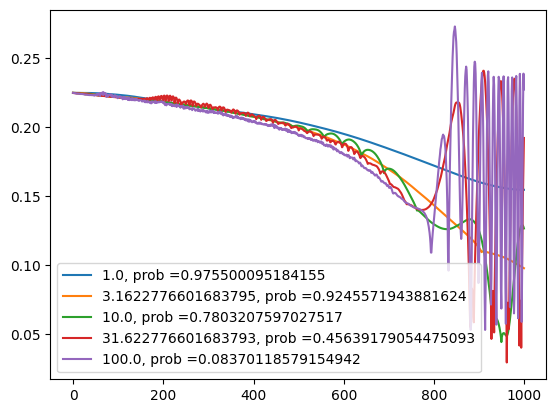

In [18]:
for t in range(len(taus)):
    Ut = Ut_tau[t]
    G_t = [sps.G_tfim(U[:,L:]) for U in Ut]
    P = [sps.P_n(2,G,L) for G in G_t]
    prob = np.exp(-2*np.pi**3 * taus[t]/L/L)
    plt.plot(P,label=f"{taus[t]}, prob ={prob}")
    plt.legend()
print(L*L/(2*np.pi**3))

In [19]:
def sigma_string(n,G,L):
    indices = [i for i in range(n)]

    return sps.sigma_general(indices,G,L)



/home/kristian/Desktop/Subsystem Loschmidt Echo/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Kibble Zurek/../../../../src/single_particle_sector.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  C[nx,ny] = M[Bx,Ay]


KeyboardInterrupt: 

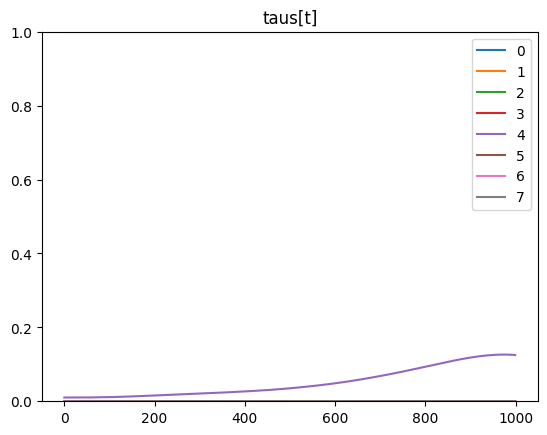

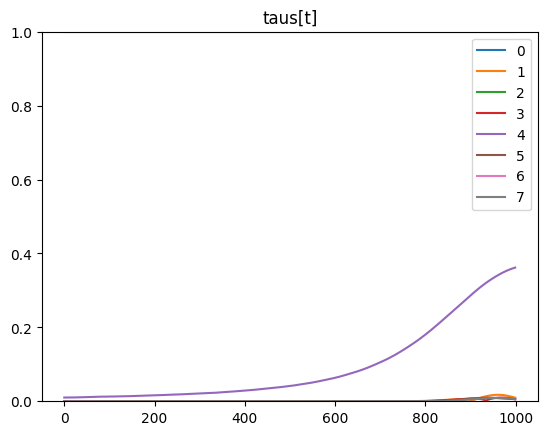

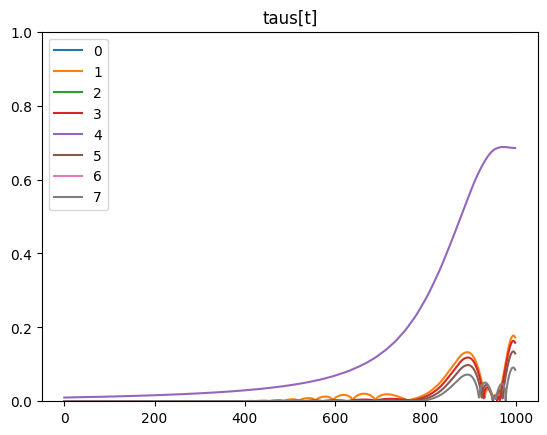

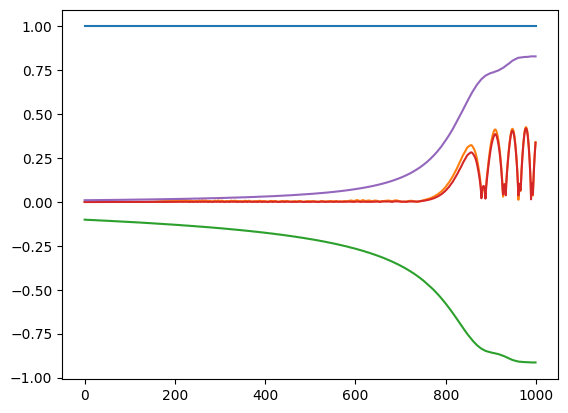

In [35]:
n = 8
for t in range(len(taus)):
    Ut = Ut_tau[t]
    G_t = [sps.G_tfim(U[:,L:]) for U in Ut]
    tau = taus[t]
    xi_hat = tau**0.5  #
    plt.figure()
    for ni in range(n):
        sigma = [sigma_string(ni,G,L) for G in G_t]
        plt.plot(sigma,label=ni)
    plt.legend()
    plt.ylim(0,1)
    plt.title(f'taus[t]')


(0.0, 1.0)

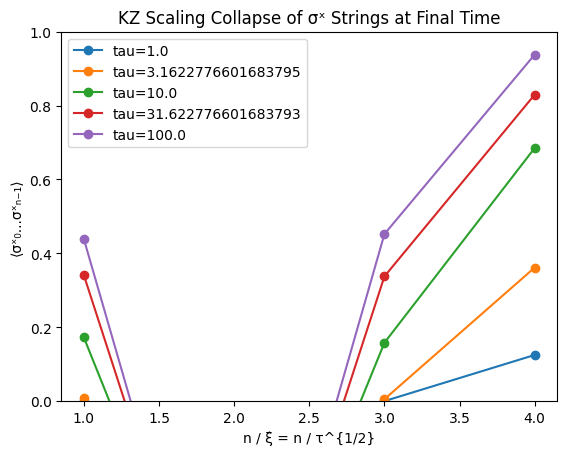

In [21]:
n_max = 4
plt.figure()
for t in range(len(taus)):
    Ut = Ut_tau[t]
    G_final = sps.G_tfim(Ut[-1][:, L:])  # final time step
    tau = taus[t]
    xi_hat = tau**0.5  # KZ length scale

    ns = np.arange(1, n_max + 1)
    sigmas = [sigma_string(ni, G_final, L) for ni in ns]
    x_rescaled = ns 

    plt.plot(x_rescaled, sigmas, marker='o', label=f"tau={tau}")
plt.legend()
plt.xlabel("n / ξ̂ = n / τ^{1/2}")
plt.ylabel("⟨σˣ₀...σˣₙ₋₁⟩")
plt.title("KZ Scaling Collapse of σˣ Strings at Final Time")
plt.ylim(0,1)


In [33]:
h = 500
E, V = la.eigh(sps.H_bdg(h,L,J))
V = V[:,:L]
G = sps.G_tfim(V)

/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 1.0)

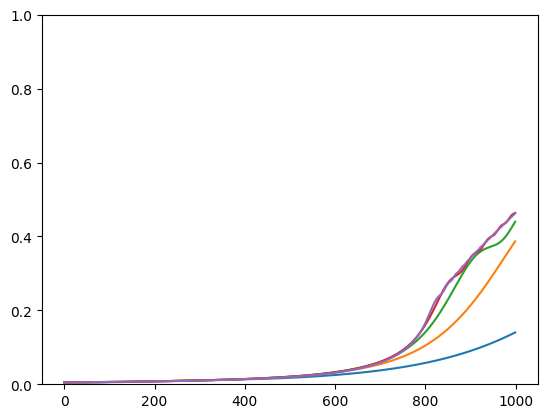

In [92]:
j = 0
for k in range(len(Ut_tau)):
 
    dat=[]
    for ti in range(len(Ut_tau[0])):
        Ut = Ut_tau[k]
        V= sps.G_tfim(Ut[ti][:,:L])
        # Extract blocks
        A = V[:L, :L]       # upper half, left block
        B = V[:L, L:]       # upper half, right block (doesn't exist here)
        C = V[L:, :L]       # lower half, left block
        D = V[L:, L:]       # lower half, right block (doesn't exist here)

        dat.append(la.trace(A)/L)

    plt.plot(dat)
plt.ylim(0,1)

In [93]:
h = 500
E, V = la.eigh(sps.H_bdg(h,L,J))
V = V[:,:L]
V

array([[ 4.43328994e-06,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -4.45104985e-06,  0.00000000e+00],
       [ 4.43110238e-06, -1.39253002e-07, -1.24999161e-06, ...,
         1.25497931e-06,  4.44885353e-06,  1.39810854e-07],
       [ 4.42454185e-06, -2.78368579e-07, -2.48888820e-06, ...,
        -2.49881934e-06, -4.44226672e-06, -2.79483732e-07],
       ...,
       [-1.33089253e-02,  1.40793723e-01,  1.35806035e-01, ...,
         1.35806035e-01,  1.33089253e-02,  1.40793723e-01],
       [-8.87992043e-03,  1.41142293e-01,  1.38916395e-01, ...,
        -1.38916395e-01, -8.87992043e-03, -1.41142293e-01],
       [-4.44215215e-03,  1.41351573e-01,  1.40793723e-01, ...,
         1.40793723e-01,  4.44215215e-03,  1.41351573e-01]])

In [ ]:
def H_bdg(hmax, L, Jmin, boundary_condition = "ABC"):
    #Generating Hamiltonian
    A = np.zeros((L, L))
    B = np.zeros((L, L))
    J_vals = np.random.uniform(Jmin, 1.0, size=L)  # J_j for j = 0 to L-1
    h_vals = np.random.uniform(0.0, hmax, size=L)  # h_j for j = 0 to L-1
    for j in range(L):
        A[j, j] = 2 * h_vals[j]
    for j in range(L - 1):
        A[j, j + 1] = A[j + 1, j] = -J_vals[j]
        B[j, j + 1] = -J_vals[j]
        B[j + 1, j] = J_vals[j]
    


   # Antiperiodic boundary condition (ABC) introduces a minus sign
    if boundary_condition== "ABC":
        A[0, L - 1] = A[L - 1, 0] = J_vals[L-1]
        B[L - 1, 0] = J_vals[L-1]
        B[0, L - 1] = -J_vals[L-1]

    elif boundary_condition== "PBC":
        A[0, L - 1] = A[L - 1, 0] = -J_vals[L-1]
        B[L - 1, 0] = -J_vals[L-1]
        B[0, L - 1] = J_vals[L-1]
    
    return 1/2*np.block([[A, B], [-B, -A]])




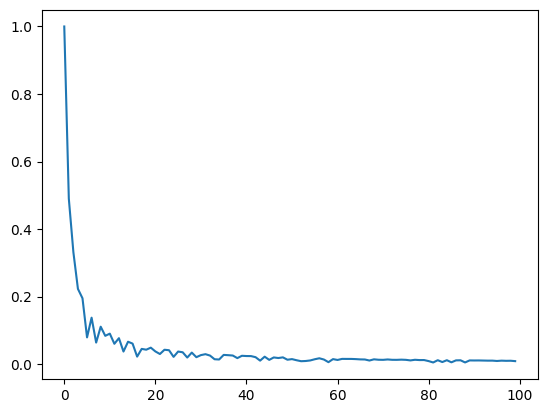

In [160]:
hmax = 10
Jmin = .0001
Li = np.linspace(1,100,100,dtype= int)
data =[]
for L in Li:
    E, V = la.eigh(H_bdg(hmax,L,Jmin))

    W = V[:,:L]
    U = W[:L,:]
    V = W[L:,:]
    IPR_mu =0 
    for mu in range(L):
        IPR_mu += np.sum([(np.abs(U[j,mu])**2+np.abs(V[j,mu])**2)**2])
    data.append(IPR_mu/L)
plt.plot(data)
#plt.yscale("log")

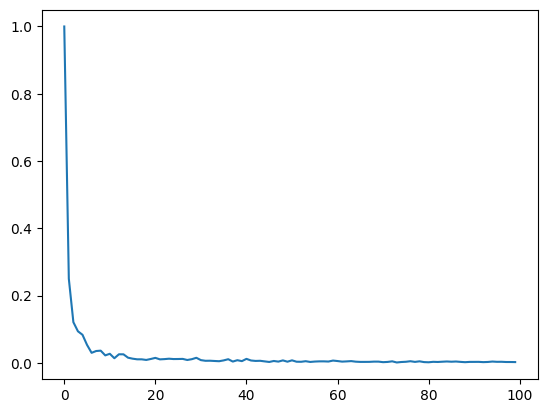

In [157]:
plt.plot(data)


In [163]:
Li = np.arange(20, 200, 10)
data = []

for L in Li:
    H = H_bdg(hmax=2.0, L=L, Jmin=0.1)  # disorder changes each L
    _, V_full = la.eigh(H)
    W = V_full[:, :L]
    U = W[:, :L]
    V = W[:, L:]

    iprs = []
    for mu in range(L):
        psi2 = np.abs(U[:, mu])**2 + np.abs(V[:, mu])**2
        iprs.append(np.sum(psi2**2))  # correct IPR_mu
    data.append(np.mean(iprs))  # average over mu

plt.plot(Li, data)
plt.xlabel("System size L")
plt.ylabel("Average IPR")


IndexError: index 0 is out of bounds for axis 1 with size 0